In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm


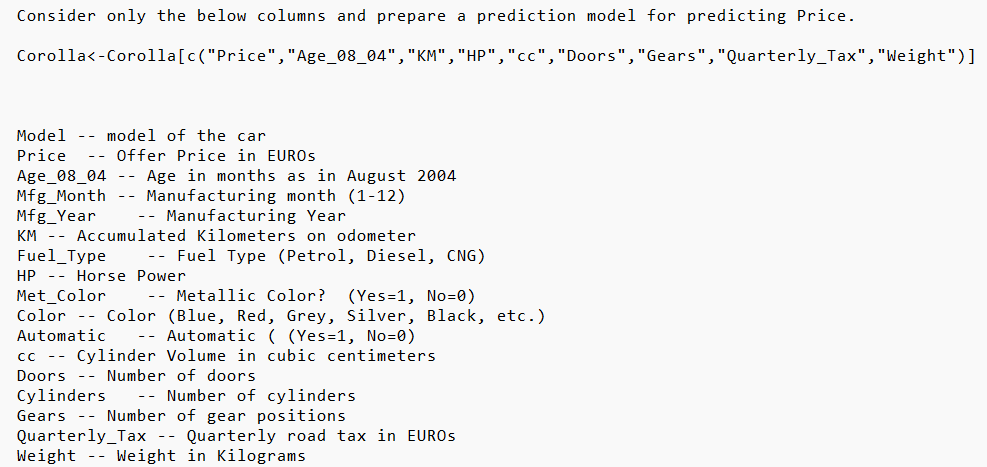

In [2]:
cars = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
cars.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## EDA

In [3]:
cars.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
cars = cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
cars = cars.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
cars.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
cars[cars.values==0]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight


In [8]:
cars.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

No null values

In [9]:
## Cheacking duplicate values

cars[cars.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
cars.drop_duplicates()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

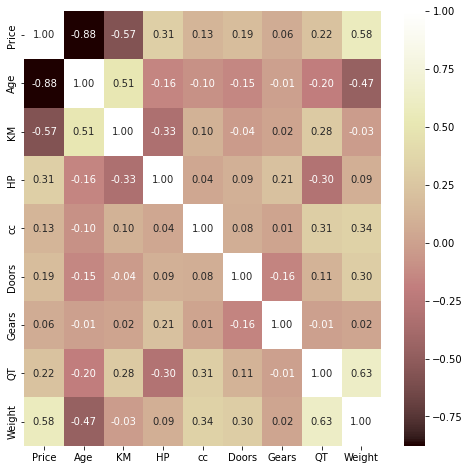

In [12]:
corr = cars.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='pink', annot=True, fmt=".2f")

#show plot
plt.show()

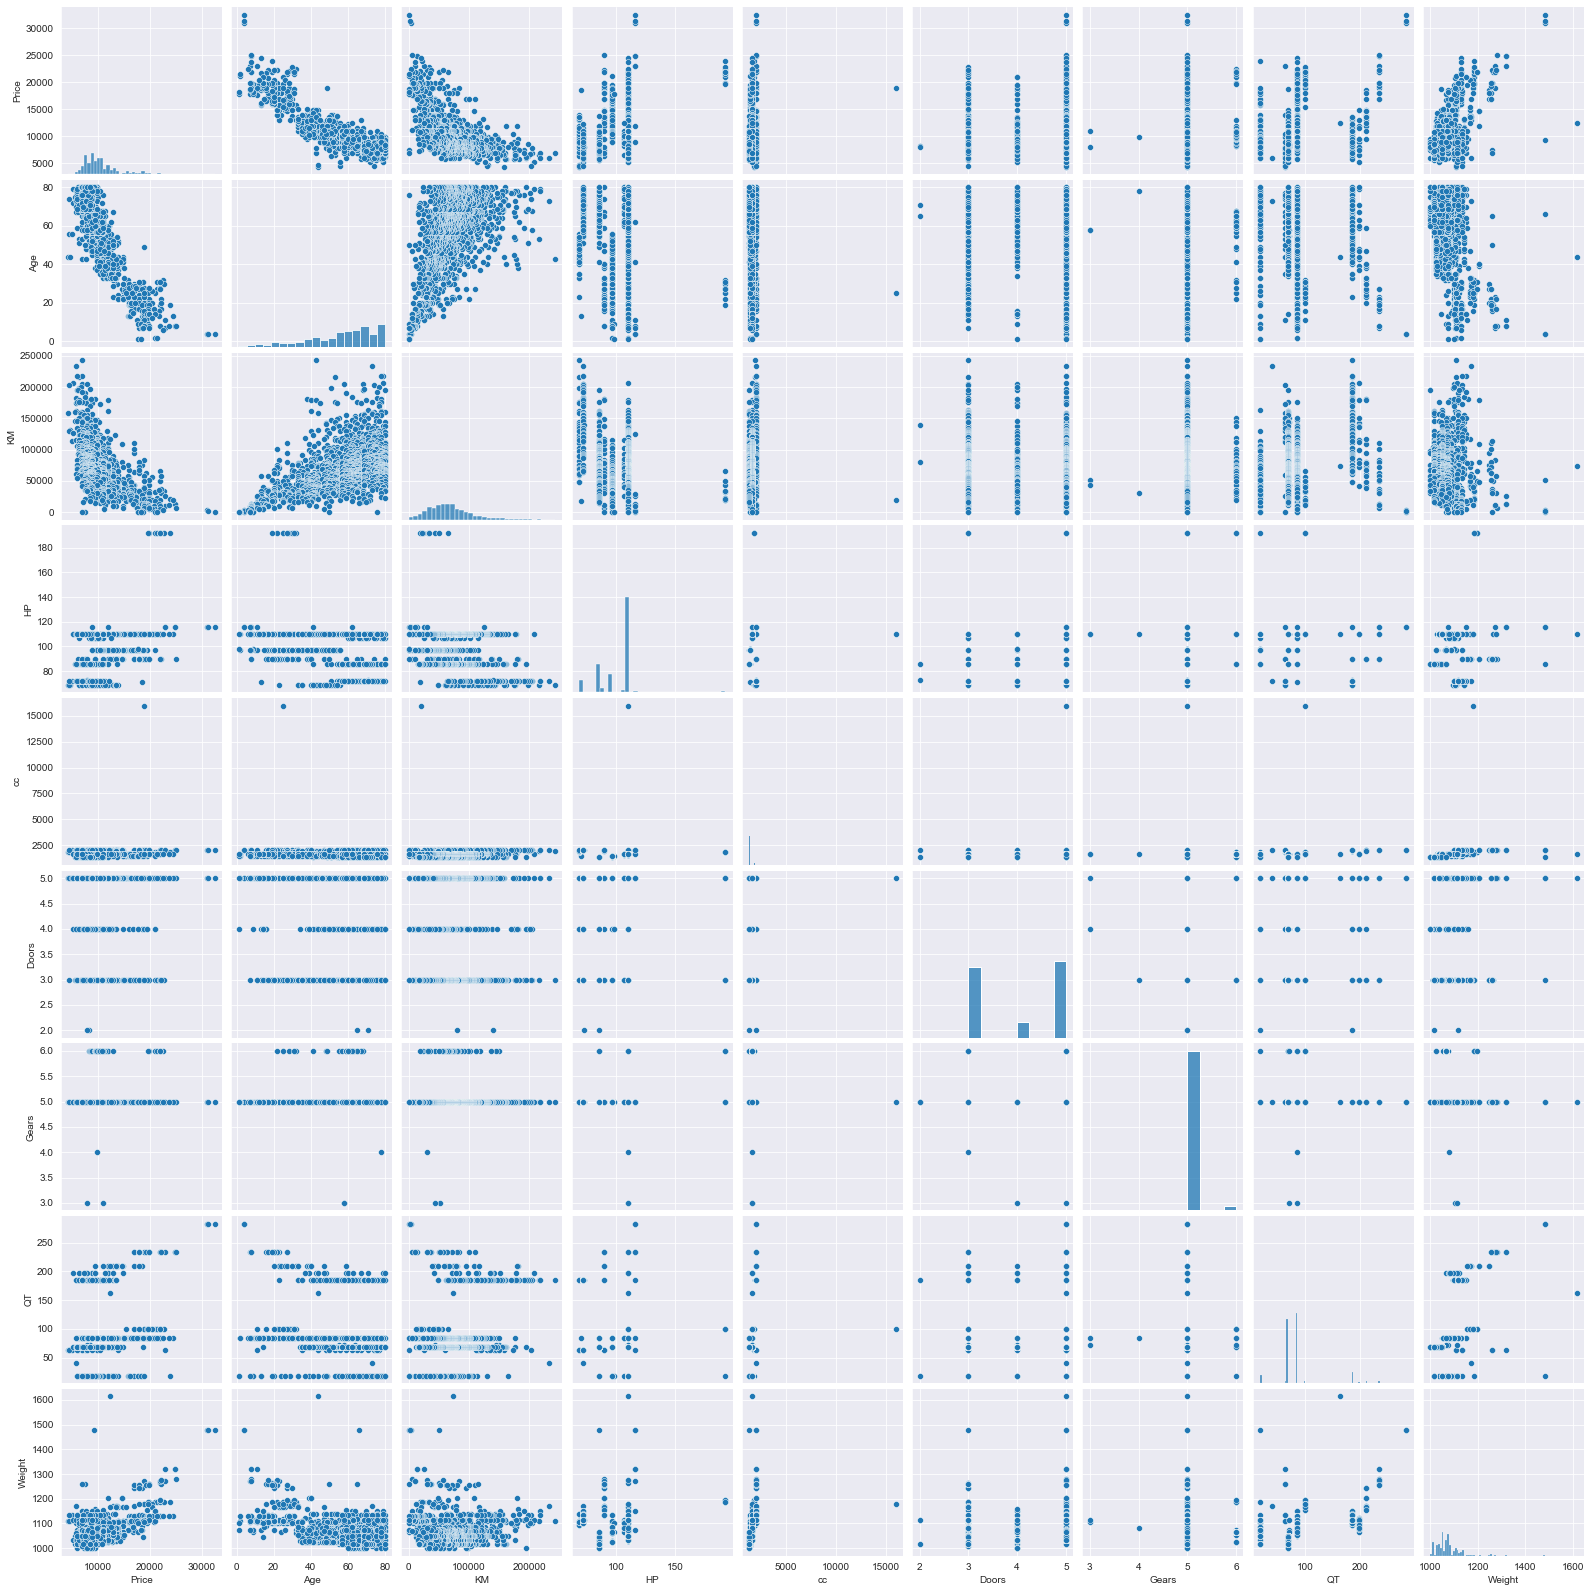

In [13]:
sns.set_style(style="darkgrid")
sns.pairplot(cars)

## Model Building

In [14]:
# Bulid Model 
model = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight", data=cars).fit()

In [15]:
#Coefficients

model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [16]:
# t values and p values:

tvalue = model.tvalues
pvalues = model.pvalues
print(tvalue)
print(pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
Weight       15.879803
dtype: float64
Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
Weight        2.048576e-52
dtype: float64


We can see that p values for Age, KM, CC and Doors is > 0.05, Hence we will build SLR and MLR for variables Age and KM

In [17]:
# Coefficient of determination: R Squared values

model.rsquared, model.rsquared_adj


(0.8637627463428192, 0.8629989775766963)

 Here R squared adjacent value is = 0.86% , Hence we can say model is good.

## SLR Model

### Buliding SLR and MLR Models for insignificant variables "Age" and "KM"


In [18]:
ml_Age = smf.ols("Price~Age", data=cars).fit()

In [19]:
ml_Age.tvalues, ml_Age.pvalues

(Intercept    138.907847
 Age          -68.978267
 dtype: float64,
 Intercept    0.0
 Age          0.0
 dtype: float64)

In [20]:
ml_KM = smf.ols("Price~KM", data = cars).fit()
ml_KM.tvalues, ml_KM.pvalues

(Intercept    88.510378
 KM          -26.267601
 dtype: float64,
 Intercept     0.000000e+00
 KM           1.757913e-124
 dtype: float64)

In [21]:
ml_AgeKM = smf.ols("Price~Age+KM", data = cars).fit()
ml_AgeKM.tvalues, ml_AgeKM.pvalues

(Intercept    146.258516
 Age          -56.334219
 KM           -12.130199
 dtype: float64,
 Intercept    0.000000e+00
 Age          0.000000e+00
 KM           2.636340e-32
 dtype: float64)

# Calculate VIF

	Price	Age	KM	HP	cc	Doors	Gears	QT	Weight

In [22]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight', data = cars).fit().rsquared
vif_Age = 1/(1-rsq_Age)
rsq_KM = smf.ols('KM~HP+cc+Doors+Gears+QT+Weight+Age', data = cars).fit().rsquared
vif_KM = 1/ (1-rsq_KM)
rsq_HP = smf.ols('HP~KM+cc+Doors+Gears+QT+Weight+Age', data =cars).fit().rsquared
vif_HP = 1/(1-rsq_HP)
rsq_cc = smf.ols('cc~HP+KM+Doors+Gears+QT+Weight+Age', data = cars).fit().rsquared
vif_cc = 1/(1-rsq_cc)
rsq_Doors = smf.ols('Doors~HP+KM+cc+Gears+QT+Weight+Age', data = cars).fit().rsquared
vif_Doors = 1/ (1-rsq_Doors)
rsq_Gears = smf.ols('Gears~HP+KM+cc+Doors+QT+Weight+Age', data = cars).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)
rsq_QT = smf.ols('QT~HP+KM+cc+Doors+Gears+Weight+Age', data = cars).fit().rsquared
vif_QT = 1/(1-rsq_QT)
rsq_Weight = smf.ols('Weight~HP+KM+cc+Doors+Gears+QT+Age', data = cars).fit().rsquared
vif_Weight = 1/ (1-rsq_Weight)



data = {'Variables': ['Age','KM','HP','cc','Doors','Gears','QT','Weight'], 'VIF': [vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
df = pd.DataFrame(data)
print(df)

  Variables       VIF
0       Age  1.884620
1        KM  1.756905
2        HP  1.419422
3        cc  1.163894
4     Doors  1.156575
5     Gears  1.098723
6        QT  2.311431
7    Weight  2.516420


VIF of all variables are < 20.
Hence, No Collinearity

# Residual Analysis

### Test for Normality of Residuals (Q-Q Plot) using residual model


In [23]:
model = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight", data = cars).fit()

Text(0.5, 1.0, 'Normal Q-Q Plot of residual')

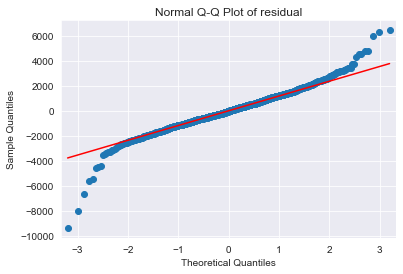

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q Plot of residual")

Here outlier value exists below -7000 so that we use (model.resid<-70000) and 
outlier value exists below 5000 so that we use (model.resid>50000)

In [25]:
import numpy as np
print(list(np.where(model.resid<-7000))) 
print(list(np.where(model.resid>5000)))  

[array([221, 601], dtype=int64)]
[array([109, 147, 523], dtype=int64)]


In [26]:
# Residual plot for Homoscedasticity or Heteroscedasticity

model = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight", data = cars).fit()

In [27]:
#getting standardized values

def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()
get_standardized_values(cars)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0.763497,-1.771349,-0.574495,-0.767774,0.997072,-1.084761,-0.140376,2.987639,1.757949
1,0.832425,-1.771349,0.117413,-0.767774,0.997072,-1.084761,-0.140376,2.987639,1.757949
2,0.887567,-1.717586,-0.715137,-0.767774,0.997072,-1.084761,-0.140376,2.987639,1.757949
3,1.163280,-1.610059,-0.547459,-0.767774,0.997072,-1.084761,-0.140376,2.987639,1.757949
4,0.832425,-1.395005,-0.800749,-0.767774,0.997072,-1.084761,-0.140376,2.987639,1.852931
...,...,...,...,...,...,...,...,...,...
1431,-0.890779,0.701771,-1.279494,-1.034778,-0.652367,-1.084761,-0.140376,-0.440632,-0.901569
1432,0.031480,0.863061,-1.320660,-1.034778,-0.652367,-1.084761,-0.140376,-0.440632,-1.091535
1433,-0.615067,0.809298,-1.373557,-1.034778,-0.652367,-1.084761,-0.140376,-0.440632,-1.091535
1434,-0.959707,0.755534,-1.376224,-1.034778,-0.652367,-1.084761,-0.140376,-0.440632,-1.091535


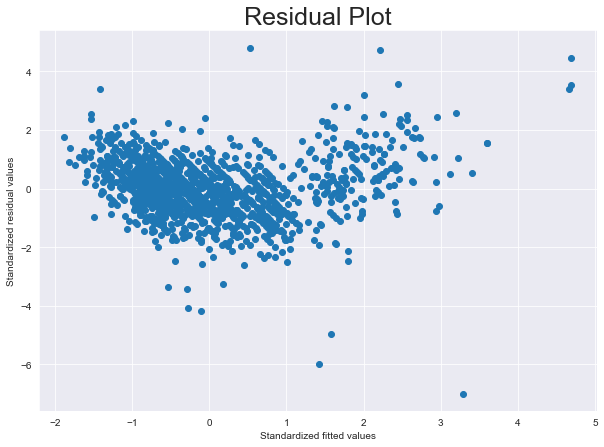

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot", size=25)
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

# Residual vs Regressors

eval_env: 1


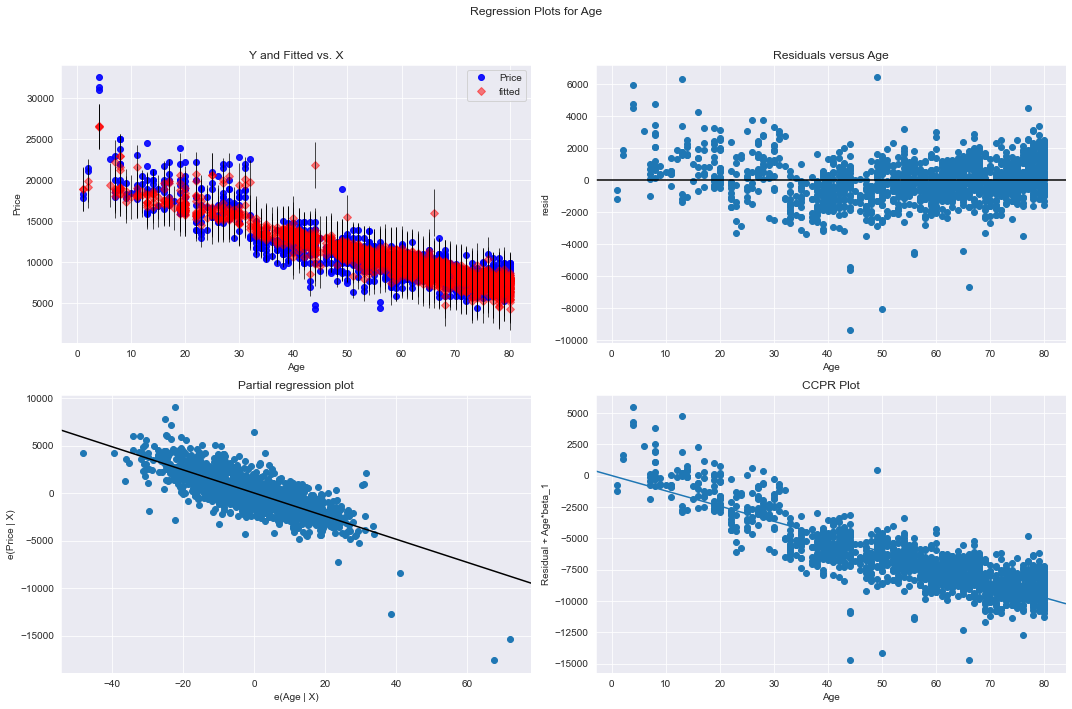

In [29]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Age", fig = fig)
plt.show()

eval_env: 1


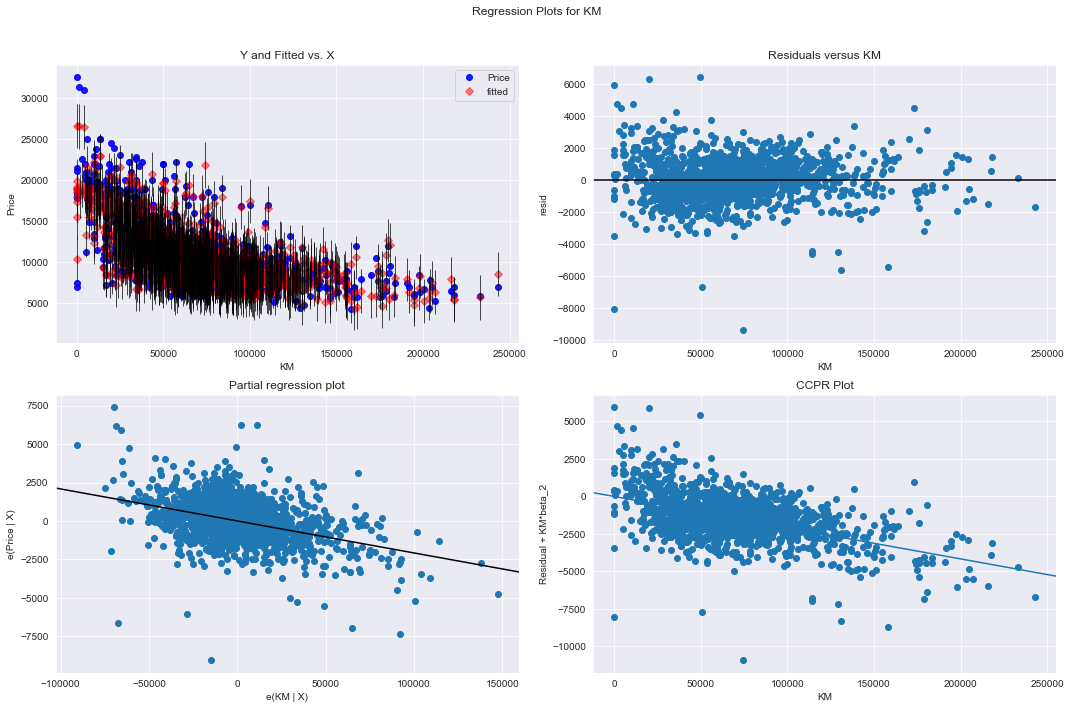

In [30]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"KM", fig = fig)
plt.show()

eval_env: 1


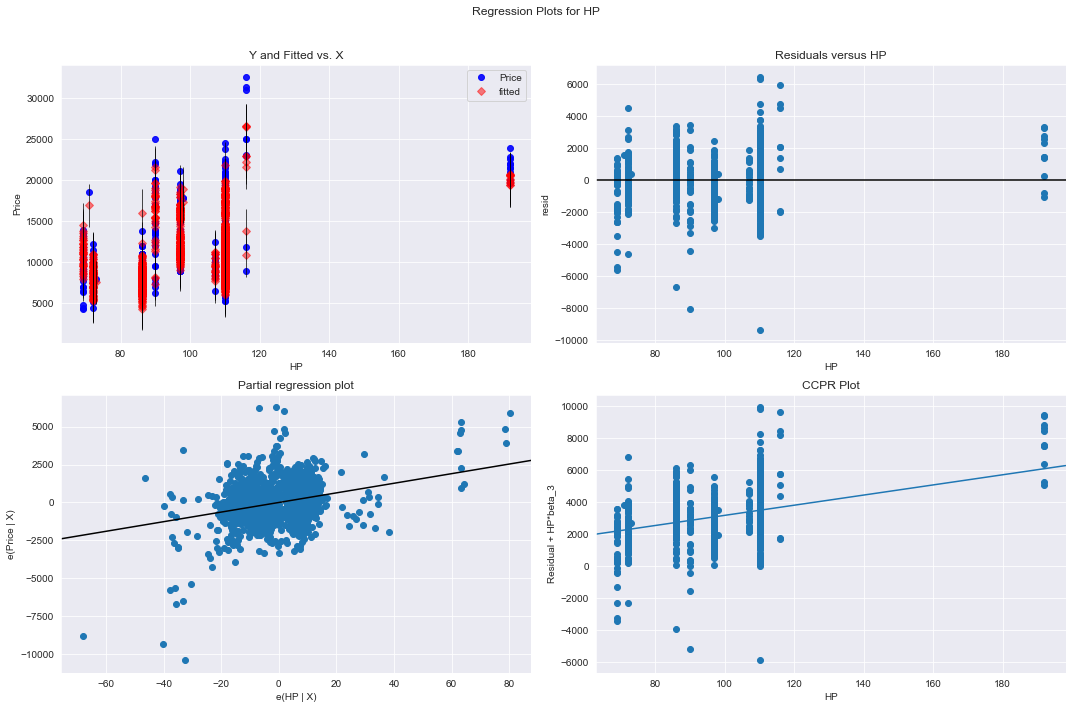

In [31]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"HP", fig = fig)
plt.show()

eval_env: 1


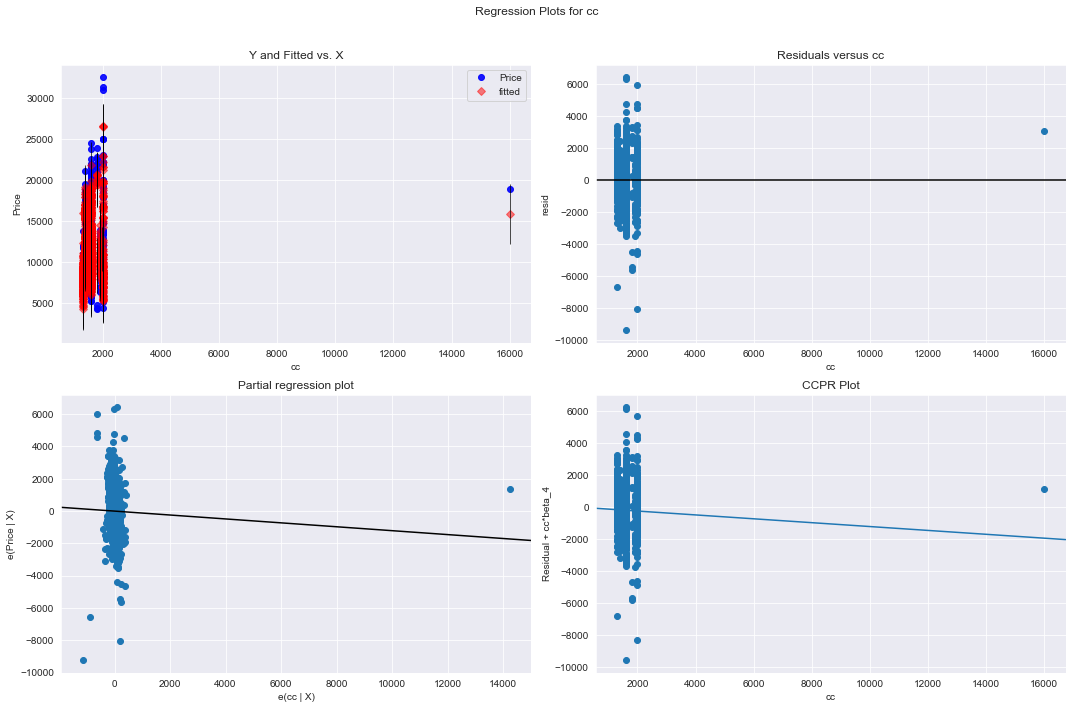

In [32]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"cc", fig = fig)
plt.show()

eval_env: 1


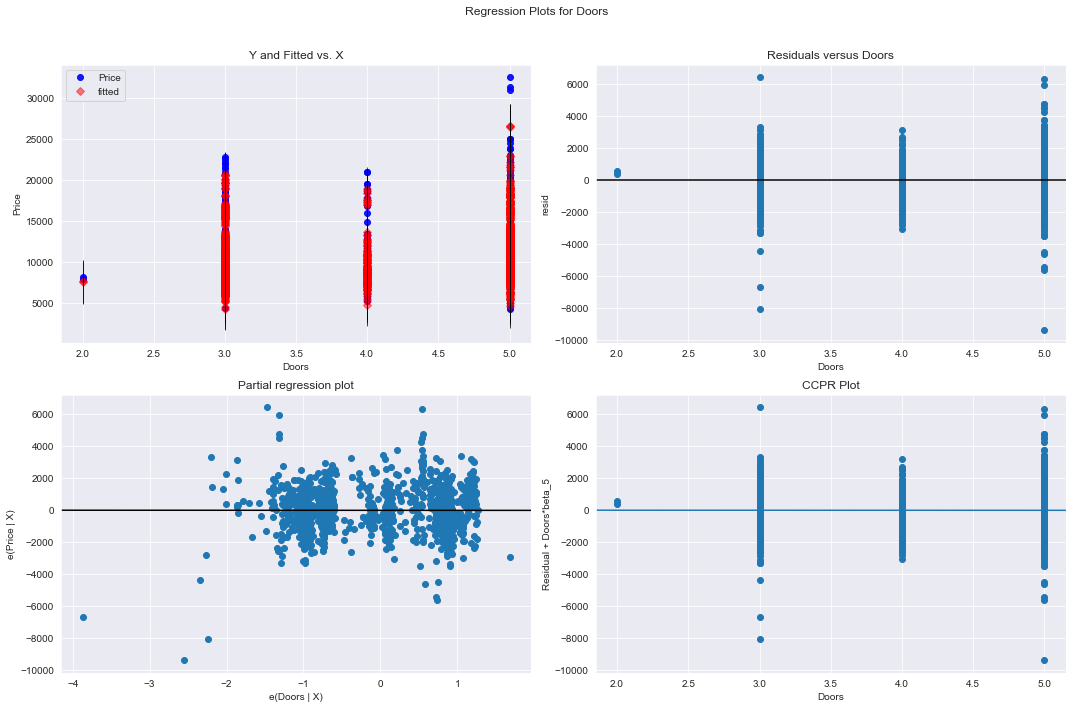

In [33]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Doors", fig = fig)
plt.show()

eval_env: 1


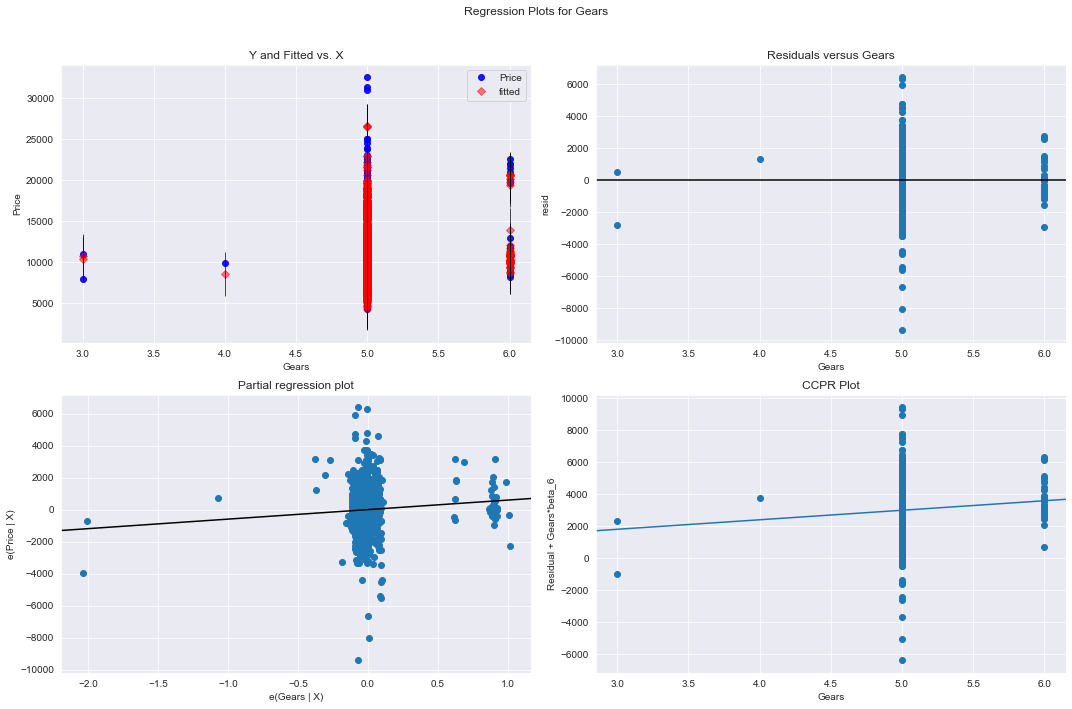

In [34]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Gears", fig = fig)
plt.show()

eval_env: 1


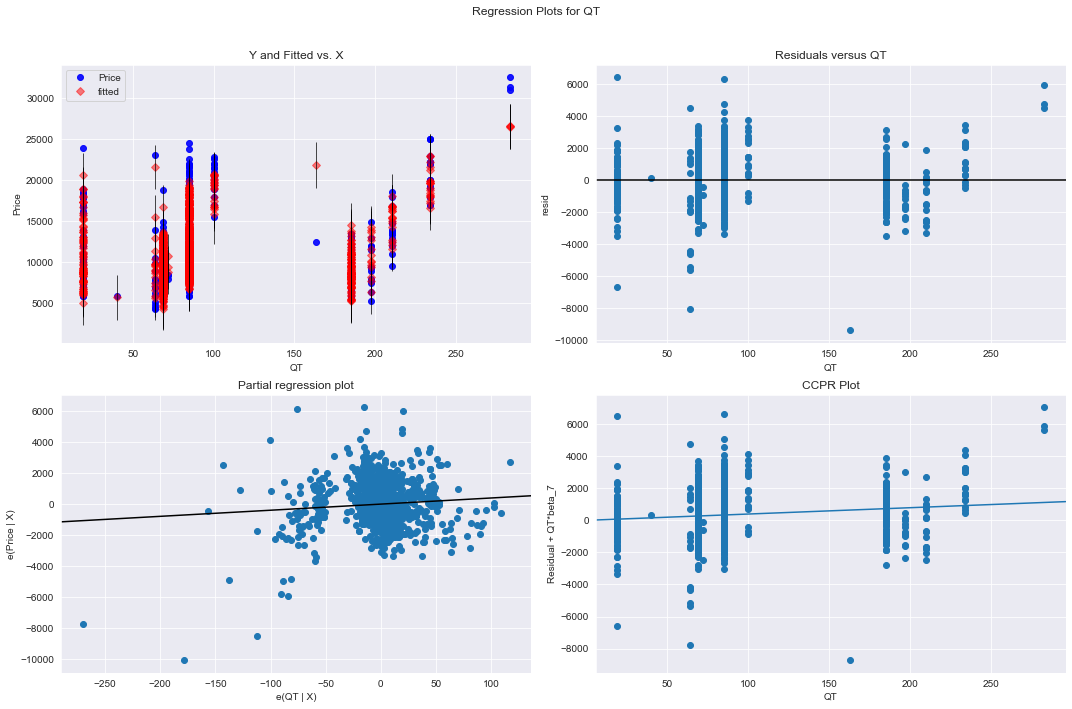

In [35]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"QT", fig = fig)
plt.show()

eval_env: 1


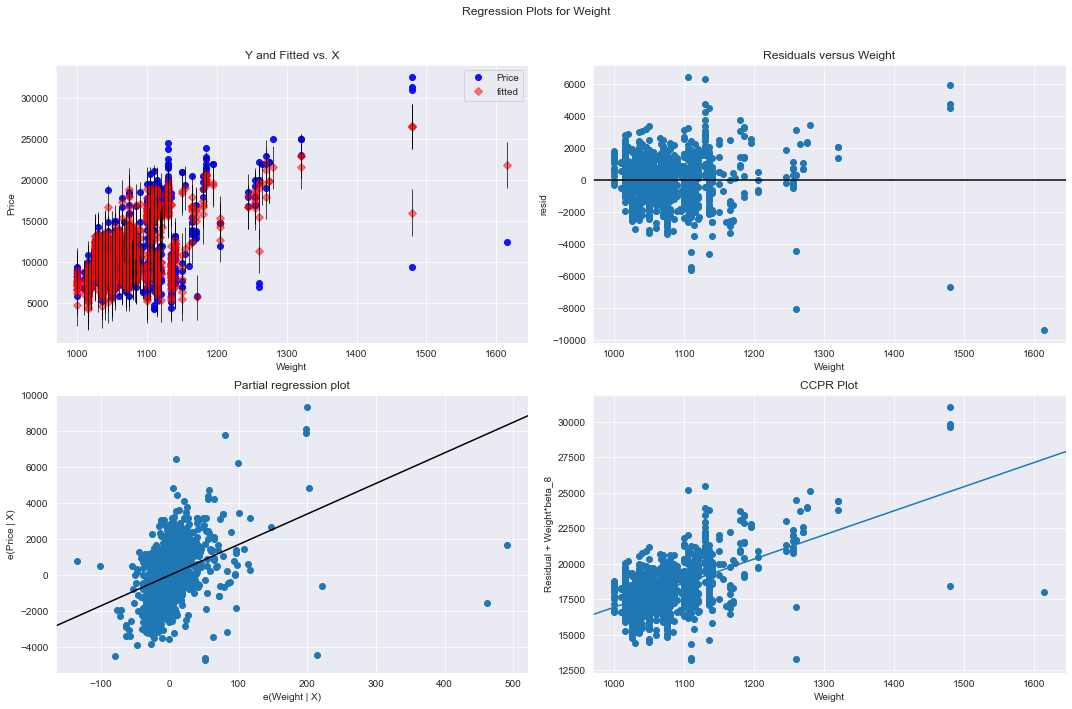

In [36]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Weight", fig = fig)
plt.show()

# Cook's Distance

In [37]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence_Age = model.get_influence()
(c_, _) = model_influence_Age.cooks_distance

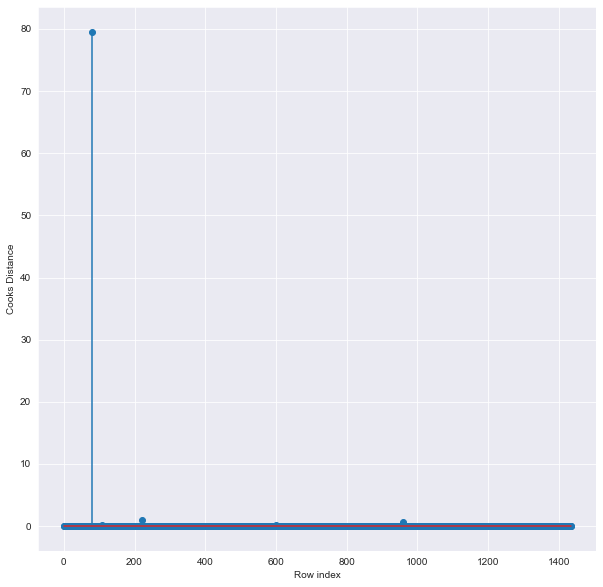

In [38]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 10))
plt.stem(np.arange(len(cars)), np.round(c_, 6))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
(np.argmax(c_),np.max(c_))

(80, 79.52010624137121)

Index and value of influencer where c is more than .5

In [40]:
cars.shape

(1436, 9)

In [41]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

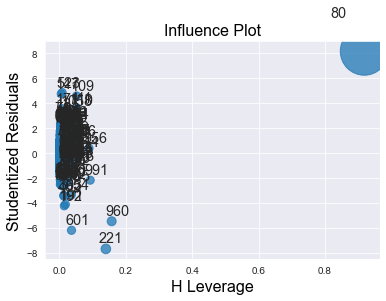

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model)
plt.show()


From the above plot, Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

In [43]:
cars[cars.index.isin([50])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
50,17950,22,62636,90,2000,5,5,234,1255


In [44]:
cars1=cars.drop(cars.index[50], axis=0).reset_index()
cars1.drop(['index'], axis=1, inplace=True)
cars1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [45]:
#Exclude variable "Age" and generate R-Squared and AIC values
final_KM = smf.ols('Price~KM+HP+cc+Doors+Gears+QT+Weight',data = cars1).fit()

In [46]:
(final_KM.rsquared, final_KM.aic, final_KM.bic)

(0.6562786725649707, 26074.867021332353, 26117.018382357903)

In [47]:
#Exclude variable "KM" and generate R-Squared and AIC values
final_Age = smf.ols('Price~Age+HP+cc+Gears+Doors+QT+Weight',data = cars1).fit()

In [48]:
(final_Age.rsquared, final_Age.aic, final_Age.bic)

(0.8369365843827761, 25004.798920409743, 25046.950281435293)

Comparing above R-Squared and AIC values, model 'final_Age' has high R- square and low AIC value 
Hence, include variable 'Age' so that multi collinearity problem would be resolved.

## Cook's Distance

In [49]:
model_influence_Age = final_Age.get_influence()
(c_M, _) = model_influence_Age.cooks_distance

In [50]:
(np.argmax(c_M),np.max(c_M))

(79, 164.501814339046)

Index and value of influencer where c is more than .5

In [51]:
# Model Prediction for new dataset
# New data for prediction
new_data=pd.DataFrame({"Doors":4,"Age":15,"KM":9651,"HP":56,"cc":5100,"Gears":6,"QT":60,"Weight":5600},index=[1])
new_data

,Doors,Age,KM,HP,cc,Gears,QT,Weight
1,4,15,9651,56,5100,6,60,5600


In [52]:
final_Age.predict(new_data)

1    88166.920347
dtype: float64

In [53]:
final_Age.predict(cars.iloc[0:9,])

0    16284.238058
1    16284.238058
2    16138.848832
3    15848.070379
4    15347.984006
5    15057.205553
6    17006.209677
7    16570.041998
8    20429.420563
dtype: float64

In [54]:
pred_y = final_Age.predict(cars)
pred_y

0       16284.238058
1       16284.238058
2       16138.848832
3       15848.070379
4       15347.984006
            ...     
1431     7527.272096
1432     6928.163350
1433     7073.552577
1434     7218.941803
1435     8910.389596
Length: 1436, dtype: float64

## R^2 values

In [56]:
cars1={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_Age.rsquared]}
table=pd.DataFrame(cars1)
table

,Prep_Models,Rsquared
0,Model,0.863763
1,Final_Model,0.836937


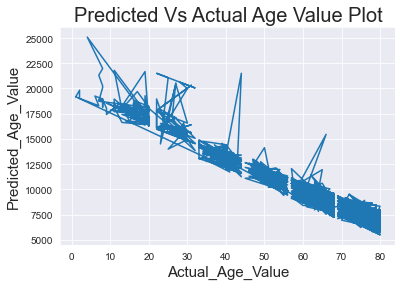

In [57]:
# Graph showing relation between Predicted and actual value
import matplotlib.pyplot as plt
cars.Age # Actual Value
pred_y   # Predicted Value
plt.plot(cars.Age,pred_y); plt.xlabel("Actual_Age_Value",size=15); plt.ylabel("Predicted_Age_Value",size = 15)
plt.title("Predicted Vs Actual Age Value Plot", size=20)
plt.show()